# <center> Course: CHE1147H - Data Mining in Engineering <center>
## <center> Programming Assignment 4: Potery <center>
    
#### <center> Yunjie Xu 1008601951<center> 
    


In [1]:
import  pandas as pd 
import  numpy as np
import  matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from matplotlib.ticker import MaxNLocator
from sklearn.preprocessing import MaxAbsScaler
import  seaborn as sns

## 1 Chemical composition of pottery
### 1.1 Data exploration with PCA
    1. Import and view the data. How many columns do you have? Which columns will you use in your PCA?

In [2]:
# Import and view the data
pottery = pd.read_csv('Pottery.csv')
pottery.head()

,Unnamed: 0,Site,Al,Fe,Mg,Ca,Na
0,1,Llanedyrn,14.4,7.00,4.30,0.15,0.51
1,2,Llanedyrn,13.8,7.08,3.43,0.12,0.17
2,3,Llanedyrn,14.6,7.09,3.88,0.13,0.20
3,4,Llanedyrn,11.5,6.37,5.64,0.16,0.14
4,5,Llanedyrn,13.8,7.06,5.34,0.20,0.20


In [3]:
print(f'This dataset has {len(pottery.columns)} columns.')

This dataset has 7 columns.


In [4]:
print(f'{pottery.columns[2:]} columns will use in my PCA.')

Index(['Al', 'Fe', 'Mg', 'Ca', 'Na'], dtype='object') columns will use in my PCA.


    2. Pre-process the data and perform PCA with 3 PCs.

In [5]:
# Drop unnecessary columns and reset index
pottery_clean = pottery.drop(["Unnamed: 0"], axis=1)
pottery_clean.set_index("Site", inplace=True)

# standardize data
scaler = StandardScaler()
pottery_scaled = scaler.fit_transform(pottery_clean)

# perform PCA with 3 PCs
pca = PCA(n_components=3, svd_solver='full')

# Extract the scores
PC_scores = pca.fit_transform(pottery_scaled)
scores_pd = pd.DataFrame(data = PC_scores
                         ,columns = ['PC1', 'PC2', 'PC3']
                         ,index = pottery.index)
scores_pd 

,PC1,PC2,PC3
0,-1.778026,2.289445,-0.075289
1,-0.611193,0.122065,-0.499044
2,-0.722428,0.370209,-0.207550
3,-1.417696,-0.555600,-0.557590
4,-1.486801,-0.004081,0.195248
5,-1.259044,-0.092347,-0.783259
6,-1.180703,-0.607921,-0.575010
7,-1.490385,-0.498745,-0.336582
8,-2.076010,0.000500,0.220714
9,-2.311320,-0.376341,0.800851


In [6]:
# Extract the loadings
loadings_pd = pd.DataFrame(data = pca.components_.T
                           ,columns = ['PC1', 'PC2', 'PC3']
                           ,index = pottery_clean.columns)
loadings_pd

,PC1,PC2,PC3
Al,0.445434,0.356524,0.694985
Fe,-0.478132,0.041175,-0.157338
Mg,-0.486541,-0.049607,0.158560
Ca,-0.449054,-0.344146,0.683443
Na,-0.366888,0.866197,0.002043


    3. Plot the cumulative explained variance graph. What percent of the variance do the first 2 and 3 components describe?

In [7]:
pca_per = pca.explained_variance_ratio_

pca_2 = pca_per[0] + pca_per[1]
pca_3 = pca_per[0] + pca_per[1] + pca_per[2] 

print(f'2 components describe {round(pca_2,5)} variance, and 3 components describe {round(pca_3,5)} variance')


2 components describe 0.89732 variance, and 3 components describe 0.94616 variance


<Figure size 576x432 with 0 Axes>

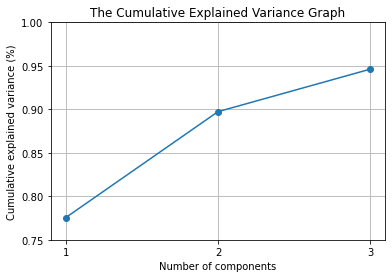

In [8]:
plt.figure(figsize=(8,6))

ax = plt.figure().gca()
ax.xaxis.set_major_locator(MaxNLocator(integer=True))

plt.plot([1,2,3], 
         [pca_per[0],pca_2,pca_3],'-o')

plt.title('The Cumulative Explained Variance Graph')
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance (%)')
plt.ylim(0.75,1)
plt.grid()
plt.show()

    4. Plot the scores-loadings graph for PC1-PC2. Visualize the different sites with a different colour or symbol.

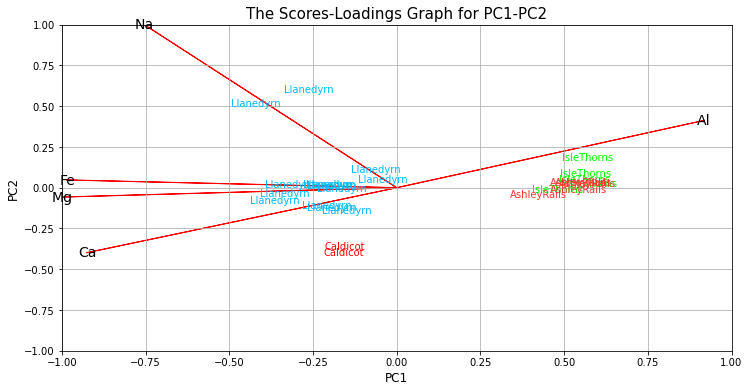

In [9]:
plt.figure(figsize=(12,6))

xt = PC_scores[:,:2][:,0]
yt = PC_scores[:,:2][:,1]
xt_scaled = xt / (xt.max() - xt.min())
yt_scaled = yt / (yt.max() - yt.min())

score_labels = pottery_clean.index # Label: site
score_labels = zip(np.vstack((xt_scaled, yt_scaled)).T, score_labels)

# Visualize sites 
for (x,y), label in score_labels:
    if label == 'AshleyRails':
        plt.text(x, y, 'AshleyRails', size=10, color = '#FF3333')
    elif label == 'Caldicot':
        plt.text(x, y, 'Caldicot', size=10, color = '#FF0000')
    elif label == 'IsleThorns':
        plt.text(x, y, 'IsleThorns', size=10, color = '#00FF00')
    else:
        plt.text(x, y, 'Llanedyrn', size=10, color = '#00BBFF')
            

# Loading
n = loadings_pd.shape[0]
p = loadings_pd.iloc[:,:2]
p_scaled = MaxAbsScaler().fit_transform(p)

# Label: raw material
loading_labels=loadings_pd.index 

# Visualize raw materials
for i in range(n):
    plt.arrow(0, 0, p_scaled[i,0], p_scaled[i,1], color = 'red')
    plt.text(p_scaled[i,0], p_scaled[i,1], loading_labels[i], ha = 'center', va = 'center', size=14)

plt.xlim(-1,1)
plt.ylim(-1,1)
plt.title ('The Scores-Loadings Graph for PC1-PC2',fontsize=15)
plt.xlabel('PC1', fontsize=12)
plt.ylabel('PC2', fontsize=12)
plt.grid()
plt.show()

    5. How does the map of scores-loadings explains the reason that your company uses the raw material from Isle Thorns and Ashley Rails to manufacture Product B?
    
    
 <div style='color:darkgreen'> Based on the clusters in the map, the compositions of Isle Thorns and Ashley Rails's raw materials are similar, both contain high concentration of AI (Aluminum) and both contain low concentration of other ingredients(Ca-Fe-Mg-Na), even less than average. 
    
    
   

    6. Is the raw material from Caldicot a good replacement for Llanedyrn? Yes or no and why?
    
 <div style='color:darkgreen'> No, raw material from Caldicot is not a good replacement for Llanedyrn. Although, elements from Caldicot close to the majority of samples from Llanedyrn. The detaill proportions are different, for example, Llanedyrn have very high concentration of Na, but the Na of Caldicot is on the average level.
    

    7. What are the biggest differences in the two big clusters? How are the two samples from the candidate Caldicot different than the Llanedyrn samples?
    
<div style='color:darkgreen'> The first big clusters include the samples from Isle Thorns and Ashley Rails, they contain high concentration of AI, but low concentration on other elements. On the second big cluster include the samples from Llanedyrn has opposite concentration distribution. And Llanedyrn has all four major components of Na, Fe, Mg and Ca which make these two sources very different, however, Caldicot potentially have relatively large amount of Ca.

    8. Confirm the answers by producing the boxplot of the 5 variables grouped by the site of the raw material shown below.


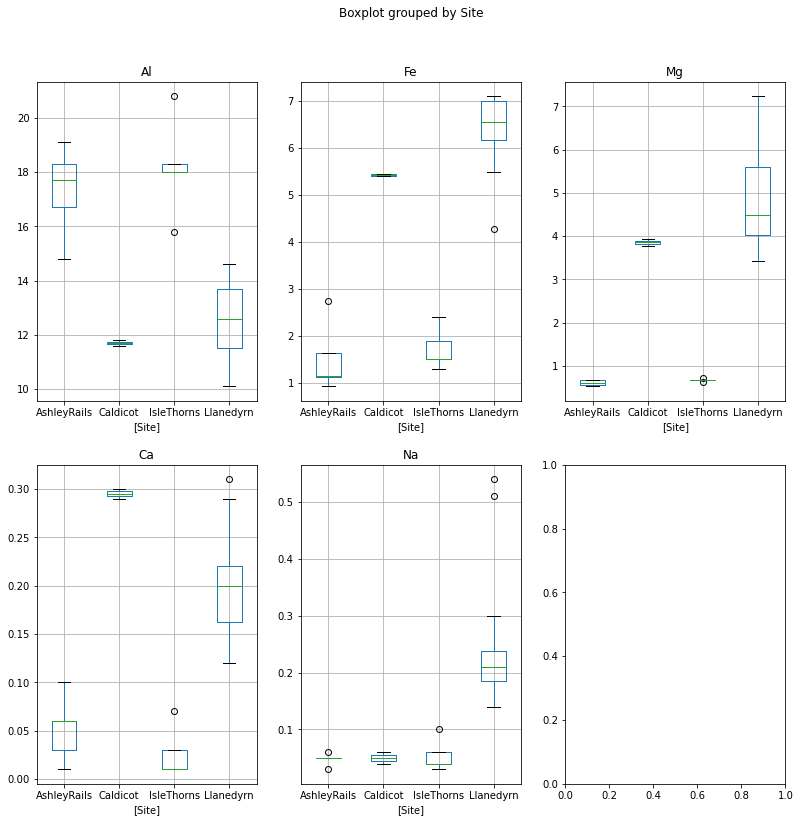

In [10]:

elements = ['Al', 'Fe', 'Mg', 'Ca', 'Na']

fig, axes = plt.subplots(nrows=2, ncols=3,figsize=(13,13))
for i in range(5):
    if i < 3:
        pottery[['Site',elements[i]]].boxplot(by='Site',ax=axes[0,i])
    else:
        pottery[['Site',elements[i]]].boxplot(by='Site',ax=axes[1,i-3])
